# ETL (Extract, Transform, Load) Process

## Objectives

* Load and preprocess the Global AI Job Market & Salary Trends 2025.
* Perform exploratory data analysis (EDA) to understand data distribution and relationships.
* Identify key risk factors associated with AI job market trends.
* Store cleaned and processed data for further analysis and model training.
* Develop data visualizations to support insights.

## Inputs

* Data Source: Global AI Job Market & Salary Trends 2025 dataset (ai_job_dataset.csv) https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025.
* Libraries: pandas, numpy, matplotlib, seaborn, os,  SciPy, Scikit-learn, Plotly.
* Environment: Jupyter Notebook, Python 3.x.
* Columns in the dataset: 'Job Title', 'Company', 'Location', 'Salary Estimate', 'Job Description', 'Rating', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'.

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

## 1. Environment Setup & Import Libraries


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

## 2. Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'd:\\Documents\\TC Tanzila\\code Ins\\Capstone\\Global-_AI_Job_Market_Salary_Trends_2025'

## 3. Define file paths

In [4]:
raw_data_dir = os.path.join(current_dir, 'data/raw') #path directory

processed_data_dir = os.path.join(current_dir, 'data/clean') #path directory

## 4. Load the dataset


In [12]:
# Load csv file into a DataFrame

df = pd.read_csv(os.path.join(raw_data_dir, 'ai_job_dataset.csv')) #load the dataset
df.head() #displaying dataframe

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## 5. Initial Inspection of the dataset: Shape, Info & Summary Statistics

In [13]:
# Preview data
display(df.head(3))

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech


In [15]:
# preview data shape
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 15000 rows and 19 columns.


In [16]:
# EDA 
#column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [30]:
# Summary Statistics for numerical columns

df.describe(include=[np.number]).astype("int64")

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000,15000,15000,15000,15000
mean,115348,49,6,1503,7
std,60260,40,5,576,1
min,32519,0,0,500,5
25%,70179,0,2,1003,6
50%,99705,50,5,1512,7
75%,146408,100,10,2000,8
max,399095,100,19,2499,10


## 6. Missing Values & Duplicates

In [17]:
#checking for missing values
df.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [18]:
#convert the column 'benefits_score' values to datatype to int
df['benefits_score'] = df['benefits_score'].astype(int)

In [20]:
#checking for duplicates
duplicate_check =   df.duplicated().sum()
print(f'The dataset contains {duplicate_check} duplicate rows.')


The dataset contains 0 duplicate rows.


In [21]:
#datetime conversion
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['application_deadline'] = pd.to_datetime(df['application_deadline'])


In [35]:
# checking for unique values
unique_counts = df.nunique()
unique_table = pd.DataFrame({'Column': unique_counts.index, 'Unique Values': unique_counts.values})
unique_table

,Column,Unique Values
0,job_id,15000
1,job_title,20
2,salary_usd,14315
3,salary_currency,3
4,experience_level,4
5,employment_type,4
6,company_location,20
7,company_size,3
8,employee_residence,20
9,remote_ratio,3


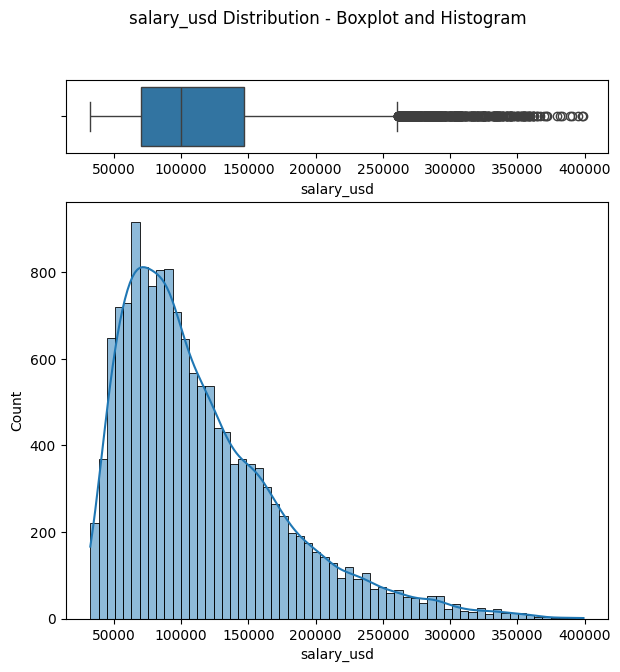

salary_usd: non-outlier range: -44163.38 to 260751.62



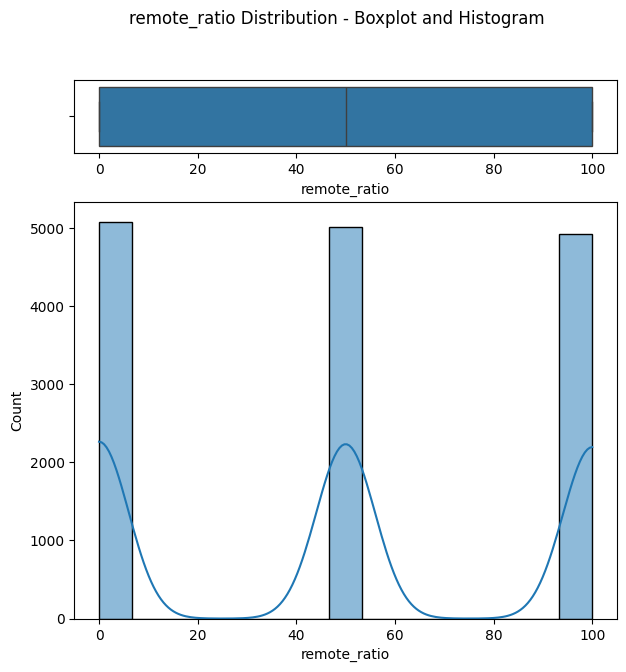

remote_ratio: non-outlier range: -150.00 to 250.00



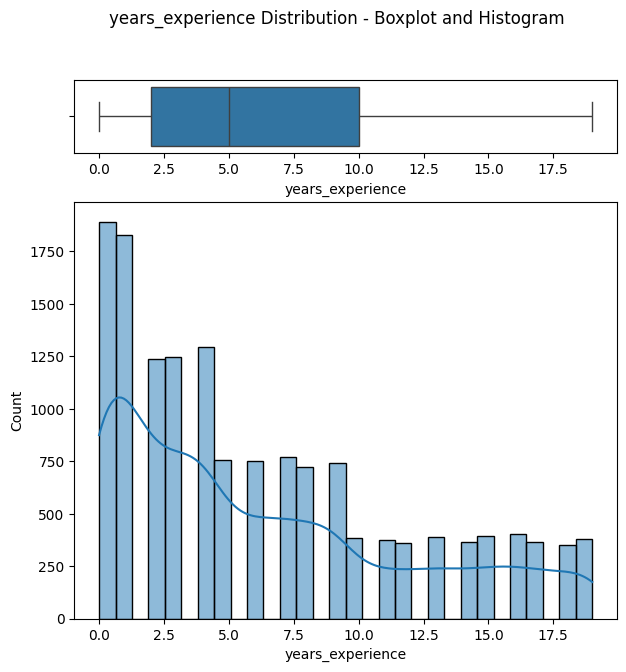

years_experience: non-outlier range: -10.00 to 22.00



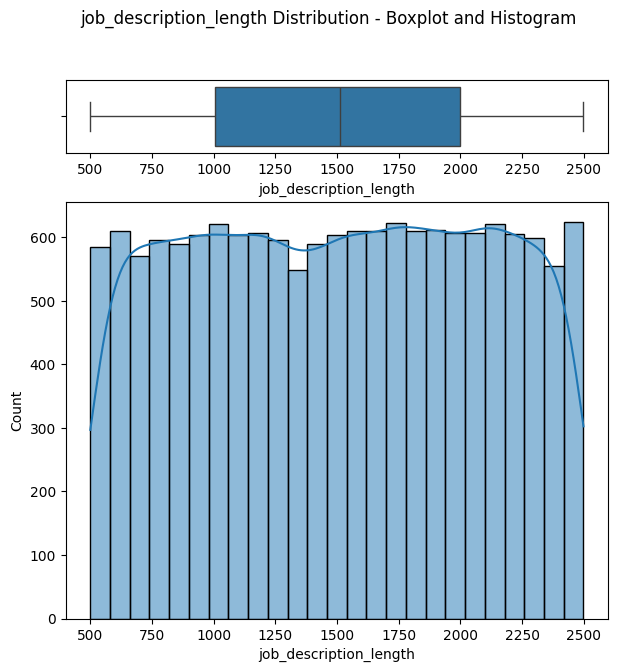

job_description_length: non-outlier range: -490.62 to 3494.38



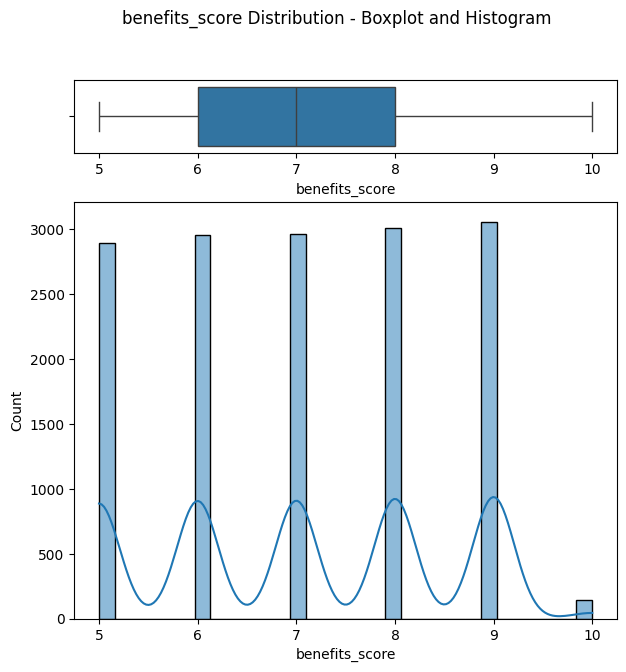

benefits_score: non-outlier range: 3.00 to 11.00



In [38]:
# Outlier detection using IQR
def plot_histogram_and_boxplot(df, numeric_only=True, save_dir=None, show=True):
    import os
    from pandas.api.types import is_numeric_dtype

    # Choose columns to plot
    cols = df.select_dtypes(include=[np.number]).columns if numeric_only else df.columns

    for col in cols:
        if not is_numeric_dtype(df[col]):
            # skip non-numeric columns when numeric_only=False may still encounter non-numeric
            print(f"Skipping non-numeric column: {col}")
            continue

        series = df[col].dropna()
        if series.empty:
            print(f"{col}: no numeric data (all NaN)")
            continue

        # compute quantiles once
        q1 = series.quantile(0.25)
        q3 = series.quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        # plotting
        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 7),
                                 gridspec_kw={"height_ratios": (.15, .85)})
        sns.boxplot(x=series, ax=axes[0])
        sns.histplot(series, kde=True, ax=axes[1])
        fig.suptitle(f"{col} Distribution - Boxplot and Histogram")

        # save or show, then close to free memory
        if save_dir:
            os.makedirs(save_dir, exist_ok=True)
            fname = os.path.join(save_dir, f"{col}_distribution.png")
            fig.savefig(fname, bbox_inches="tight")

        if show:
            plt.show()
        plt.close(fig)

        print(f"{col}: non-outlier range: {lower:.2f} to {upper:.2f}\n")

plot_histogram_and_boxplot(df)

Section 1 content

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)

IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)